# Lab 4 - Visión Por Computadora

Autores:

- Nelson García
- Joaquín Puente
- Diego Linares

---

## Task 1

### Pregunta 1: ¿Por qué una homografía 3×3 con 9 elementos solo tiene 8 GDL?

Una homografía $H$ es una matriz $3 \times 3$:

$$H = \begin{pmatrix} h_1 & h_2 & h_3 \\ h_4 & h_5 & h_6 \\ h_7 & h_8 & h_9 \end{pmatrix}$$

La transformación proyectiva se define como $\mathbf{x'} \sim H\mathbf{x}$, donde $\sim$ denota igualdad hasta un factor de escala. Es decir, si multiplicamos $H$ por cualquier escalar $\lambda \neq 0$, el mapeo es idéntico:

$$(\lambda H)\mathbf{x} = \lambda(H\mathbf{x}) \sim H\mathbf{x}$$

Esto significa que $H$ y $\lambda H$ representan la **misma** transformación. Por lo tanto, solo importa la **razón** entre los 9 elementos, no sus valores absolutos. Podemos fijar uno de ellos (por convención $h_9 = 1$), lo cual elimina 1 grado de libertad:

$$\text{GDL} = 9 - 1 = 8$$

Formalmente, $H$ vive en el espacio proyectivo $\mathbb{P}^8$ (9 parámetros módulo escala), que tiene dimensión 8.

---

#### Parte (a): Cámara que solo rota sobre su eje óptico (sin traslación ni cambio de perspectiva)

Si la cámara **solo rota** alrededor de su eje óptico (el eje $z$), la transformación entre las dos vistas se reduce a una **rotación 2D + posible escalado** en el plano imagen. Esto corresponde a una **transformación de similaridad**, cuya matriz es:

$$H_{rot} = \begin{pmatrix} s\cos\theta & -s\sin\theta & 0 \\ s\sin\theta & s\cos\theta & 0 \\ 0 & 0 & 1 \end{pmatrix}$$

Sin embargo, si asumimos que no hay zoom (escala fija $s=1$), se simplifica a una rotación pura:

$$H_{rot} = \begin{pmatrix} \cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{pmatrix}$$

**Los GDL se reducen drásticamente:**
- **Con escala:** 2 GDL ($\theta$ y $s$)
- **Rotación pura (sin escala):** **1 GDL** (solo $\theta$)

La estructura se simplifica porque:
- No hay traslación → $h_3 = h_6 = 0$
- No hay perspectiva → $h_7 = h_8 = 0$
- La submatriz $2 \times 2$ superior izquierda es ortogonal (rotación), por lo que $h_1 = h_5 = \cos\theta$ y $h_2 = -h_4 = -\sin\theta$

Ya **no** se necesitan 8 GDL; la matriz queda completamente determinada por un solo ángulo $\theta$.

---

### Pregunta 2: ¿Por qué en DLT buscamos el vector singular asociado al *menor* valor singular en lugar de invertir $A$?

En DLT, reformulamos $\mathbf{x'} = H\mathbf{x}$ como un sistema homogéneo $A\mathbf{h} = \mathbf{0}$, donde $\mathbf{h}$ es el vector de 9 incógnitas de $H$ y $A$ es una matriz $2n \times 9$ (con $n \geq 4$ correspondencias).

**¿Por qué no invertir $A$?**

1. $A$ no es cuadrada ($2n \times 9$, con $2n \geq 8$), por lo que no es invertible en el sentido clásico.
2. Buscamos una solución **no trivial** de $A\mathbf{h} = \mathbf{0}$ (no queremos $\mathbf{h} = \mathbf{0}$).
3. Con datos ruidosos, no existe $\mathbf{h}$ exacto tal que $A\mathbf{h} = \mathbf{0}$; en su lugar, minimizamos $\|A\mathbf{h}\|^2$ sujeto a $\|\mathbf{h}\| = 1$.

La SVD descompone $A = U\Sigma V^T$. La solución que minimiza $\|A\mathbf{h}\|^2$ con $\|\mathbf{h}\|=1$ es el último vector columna de $V$ (es decir, la última fila de $V^T$), que corresponde al **menor valor singular** $\sigma_9$.

**Interpretación geométrica del menor valor singular:**

- $\sigma_9$ mide cuánto "falla" el sistema de ser exactamente compatible. Si $\sigma_9 = 0$, existe una solución exacta.
- **Con ruido**, $\sigma_9 > 0$ pero es pequeño: representa la magnitud del **residuo mínimo** alcanzable. Geométricamente, es la dirección en el espacio de soluciones donde el sistema es "menos incompatible".
- Los valores singulares grandes corresponden a direcciones donde el sistema impone restricciones fuertes; el menor valor singular corresponde a la dirección **menos restringida**, que es precisamente la solución del sistema homogéneo.

---

### Pregunta 3: ¿Qué sucede si 3 de los 4 puntos seleccionados son colineales?

Si 3 de los 4 puntos de origen son colineales (están sobre una misma recta), el algoritmo DLT falla porque la **matriz $A$ pierde rango** y el sistema no tiene solución única.

**Explicación algebraica:**

Cada par de puntos contribuye 2 ecuaciones a la matriz $A$ de tamaño $8 \times 9$. Para que $H$ tenga solución única (salvo escala), $A$ debe tener rango 8 (el espacio nulo debe ser de dimensión 1).

Si 3 puntos son colineales, digamos $\mathbf{p}_1$, $\mathbf{p}_2$, $\mathbf{p}_3$ están alineados, entonces uno de ellos es combinación afín de los otros dos:

$$\mathbf{p}_3 = \alpha\,\mathbf{p}_1 + (1-\alpha)\,\mathbf{p}_2$$

Esto implica que las filas de $A$ correspondientes a $\mathbf{p}_3$ son combinación lineal de las filas de $\mathbf{p}_1$ y $\mathbf{p}_2$. En consecuencia:

$$\text{rango}(A) \leq 6 < 8$$

Con rango $\leq 6$, el espacio nulo de $A$ tiene dimensión $\geq 3$ (en lugar de 1), lo que significa que existen **infinitas** homografías que satisfacen las restricciones. La SVD devolverá un vector, pero no será la $H$ correcta porque el problema está **sub-determinado**.

**Intuición geométrica:** Una homografía queda determinada por 4 puntos en **posición general** (ningún trío colineal). Los puntos colineales no aportan suficiente información sobre la transformación en 2D, ya que solo restringen el mapeo a lo largo de una línea, dejando la dirección perpendicular sin determinar. Es como intentar definir un plano con puntos que están todos sobre la misma recta: no hay suficiente "dispersión" bidimensional para fijar la transformación.


---

## Task 2:

El objetivo de esta parte es implementar el pipeline de alineación sin depender de cajas negras. Por ello
considere que no deben de usar cv2.findHonography o cv2.RANSAC. Además para este laboratorio
necesitara crear su propio dataset, por ello tome 3 fotografías propias de una escena planar (i.e. una
pancarta en una pared, un cuadro, o una fachada de edificio lejana) con ángulos y perspectivas
drásticamente diferentes. Con esto realice:

1. Detección y Macheo

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


def imread_color(path: str):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    if img is None:
        raise FileNotFoundError(f"No pude leer la imagen: {path}")
    return img

def to_gray(img_bgr):
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

def create_feature(method: str):
    method = method.lower()
    if method == "sift":
        if not hasattr(cv2, "SIFT_create"):
            raise RuntimeError("Instala opencv-contrib-python para SIFT.")
        return cv2.SIFT_create()
    elif method == "orb":
        return cv2.ORB_create(nfeatures=4000)
    else:
        raise ValueError("method debe ser 'sift' o 'orb'")

def create_bf(method: str):
    method = method.lower()
    norm = cv2.NORM_L2 if method == "sift" else cv2.NORM_HAMMING
    return cv2.BFMatcher(normType=norm, crossCheck=False)

def draw_and_save_matches(img1_bgr, kp1, img2_bgr, kp2, matches, out_path, max_draw=600):
    matches_to_draw = matches[:max_draw] if len(matches) > max_draw else matches
    vis = cv2.drawMatches(img1_bgr, kp1, img2_bgr, kp2, matches_to_draw, None,
                          flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    cv2.imwrite(out_path, vis)
    return vis

def show_bgr(img_bgr, title=""):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(14, 7))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()




Normalizacion de puntos para mejorar la estabilidad numérica en RANSAC


In [9]:
def normalizar_puntos(pts):
    """
    Recibe pts de forma (N, 2).
    Devuelve (pts_norm, T) donde T es la matriz 3×3 de normalización
    tal que pts_norm = (T @ pts_hom.T).T  (en coordenadas homogéneas).
    """
    mu = pts.mean(axis=0)           # centroide
    std = pts.std()                 # desviación estándar global
    std = max(std, 1e-8)            # evitar división por cero
    escala = np.sqrt(2) / std       # escala para que distancia media al origen ≈ √2

    T = np.array([
        [escala,  0,     -escala * mu[0]],
        [0,       escala,-escala * mu[1]],
        [0,       0,      1            ]
    ])

    # Convertir a homogéneos, aplicar T
    pts_h = np.column_stack([pts, np.ones(len(pts))])   # (N, 3)
    pts_n = (T @ pts_h.T).T                             # (N, 3)
    pts_norm = pts_n[:, :2]                             # (N, 2)
    return pts_norm, T


    Calcula la homografía H (3×3) que mapea puntos_src → puntos_dst.

    Parámetros
    ----------
    puntos_src : array-like (4, 2)  — puntos en imagen fuente
    puntos_dst : array-like (4, 2)  — puntos correspondientes en imagen destino

    Retorna
    -------
    H : ndarray (3, 3)  — matriz de homografía normalizada y escalada (H[2,2]=1)


Estima la homografía robusta usando RANSAC manual (sin cv2.findHomography/RANSAC).

Parámetros

    ----------

matches     : lista de cv2.DMatch ya filtrados (ratio test recomendado)

kp1, kp2    : keypoints de imagen 1 e imagen 2

umbral      : distancia máxima (px) para considerar un inlier

prob_exito  : probabilidad deseada de encontrar al menos una muestra libre de outliers

Retorna

    -------

H_best   : ndarray (3,3)  — mejor homografía encontrada

inliers  : lista de DMatch que son inliers

In [10]:


def calcular_homografia_dlt(puntos_src, puntos_dst):

    pts_src = np.asarray(puntos_src, dtype=np.float64)
    pts_dst = np.asarray(puntos_dst, dtype=np.float64)

    assert pts_src.shape == (4, 2) and pts_dst.shape == (4, 2), \
        "Se requieren exactamente 4 pares de puntos."

    # --- Normalización ---
    src_n, T_src = normalizar_puntos(pts_src)
    dst_n, T_dst = normalizar_puntos(pts_dst)

    # --- Construir matriz A (8×9) ---
    A = np.zeros((8, 9))
    for i in range(4):
        x, y   = src_n[i]
        xp, yp = dst_n[i]
        A[2*i]   = [-x, -y, -1,  0,  0,  0,  xp*x,  xp*y,  xp]
        A[2*i+1] = [ 0,  0,  0, -x, -y, -1,  yp*x,  yp*y,  yp]

    # --- Resolver con SVD ---
    _, _, Vt = np.linalg.svd(A)
    h = Vt[-1]                      # último vector singular → solución
    H_n = h.reshape(3, 3)

    # --- Des-normalizar: H = T_dst^{-1} · H_n · T_src ---
    H = np.linalg.inv(T_dst) @ H_n @ T_src

    # Escalar para que H[2,2] = 1
    if abs(H[2, 2]) > 1e-10:
        H /= H[2, 2]

    return H

def ransac_homografia(matches, kp1, kp2, umbral=4.0, prob_exito=0.99):
    """

    """
    if len(matches) < 4:
        raise ValueError("Se necesitan al menos 4 matches para RANSAC.")

    # Extraer coordenadas
    pts1 = np.array([kp1[m.queryIdx].pt for m in matches], dtype=np.float64)
    pts2 = np.array([kp2[m.trainIdx].pt for m in matches], dtype=np.float64)

    n = len(matches)
    best_inlier_mask = np.zeros(n, dtype=bool)
    best_count = 0

    # Número de iteraciones N calculado dinámicamente
    # N = log(1 - p) / log(1 - w^4)  donde w = tasa inliers estimada
    # Iniciamos con w = 0.5 y actualizamos en cada iteración
    w_est = 0.5
    N = int(np.ceil(np.log(1 - prob_exito) / np.log(1 - w_est**4 + 1e-10)))
    N = max(N, 200)   # mínimo razonable
    N = min(N, 5000)  # techo para no colgar

    rng = np.random.default_rng(42)
    iteracion = 0

    while iteracion < N:
        # i) Seleccionar 4 matches aleatorios
        idx = rng.choice(n, size=4, replace=False)
        src4 = pts1[idx]
        dst4 = pts2[idx]

        # ii) Calcular homografía con DLT
        try:
            H_test = calcular_homografia_dlt(src4, dst4)
        except Exception:
            iteracion += 1
            continue

        # iii) Proyectar TODOS los puntos fuente con H_test
        pts1_h = np.column_stack([pts1, np.ones(n)])   # (N,3)
        proj   = (H_test @ pts1_h.T).T                  # (N,3)
        # Dividir por w (coordenada homogénea)
        denom  = proj[:, 2:3]
        denom  = np.where(np.abs(denom) < 1e-10, 1e-10, denom)
        proj_2d = proj[:, :2] / denom                   # (N,2)

        # iv) Error Euclidiano y contar inliers
        errores = np.linalg.norm(proj_2d - pts2, axis=1)
        mask    = errores < umbral
        count   = mask.sum()

        if count > best_count:
            best_count = count
            best_inlier_mask = mask.copy()
            # Actualizar N con nueva estimación de w
            w_est = count / n
            if w_est > 0 and w_est < 1:
                denom_log = np.log(max(1 - w_est**4, 1e-10))
                N_new = int(np.ceil(np.log(1 - prob_exito) / denom_log))
                N = min(max(N_new, iteracion + 1), 5000)

        iteracion += 1

    if best_count < 4:
        raise RuntimeError("RANSAC no encontró suficientes inliers.")

    # Refinamiento: recalcular H usando TODOS los inliers (SVD sobre sistema sobredeterminado)
    inlier_idx = np.where(best_inlier_mask)[0]
    src_in = pts1[inlier_idx]
    dst_in = pts2[inlier_idx]
    H_best = calcular_homografia_dlt_overdetermined(src_in, dst_in)

    inliers = [matches[i] for i in inlier_idx]
    print(f"  RANSAC: {iteracion} iters | inliers: {best_count}/{n}")
    return H_best, inliers


def calcular_homografia_dlt_overdetermined(pts_src, pts_dst):
    """
    Versión sobredeterminada de DLT para N ≥ 4 puntos.
    Construye A de tamaño (2N × 9) y resuelve con SVD.
    Incluye normalización/des-normalización igual que la versión exacta.
    """
    pts_src = np.asarray(pts_src, dtype=np.float64)
    pts_dst = np.asarray(pts_dst, dtype=np.float64)

    src_n, T_src = normalizar_puntos(pts_src)
    dst_n, T_dst = normalizar_puntos(pts_dst)

    N = len(pts_src)
    A = np.zeros((2 * N, 9))
    for i in range(N):
        x, y   = src_n[i]
        xp, yp = dst_n[i]
        A[2*i]   = [-x, -y, -1,  0,  0,  0,  xp*x,  xp*y,  xp]
        A[2*i+1] = [ 0,  0,  0, -x, -y, -1,  yp*x,  yp*y,  yp]

    _, _, Vt = np.linalg.svd(A)
    h = Vt[-1]
    H_n = h.reshape(3, 3)

    H = np.linalg.inv(T_dst) @ H_n @ T_src
    if abs(H[2, 2]) > 1e-10:
        H /= H[2, 2]
    return H

In [11]:
def match_pair(img1_path, img2_path, method="sift", out_dir="out",
               unfiltered_draw=800, filtered_draw=300, ratio=0.75):
    os.makedirs(out_dir, exist_ok=True)

    img1 = imread_color(img1_path)
    img2 = imread_color(img2_path)
    gray1 = to_gray(img1)
    gray2 = to_gray(img2)

    feat = create_feature(method)
    bf   = create_bf(method)

    kp1, des1 = feat.detectAndCompute(gray1, None)
    kp2, des2 = feat.detectAndCompute(gray2, None)

    if des1 is None or des2 is None or len(kp1) < 10 or len(kp2) < 10:
        raise RuntimeError("Muy pocos keypoints. Intenta ORB o mejor iluminación/escena.")

    # (c) Matches SIN filtrar — con ruido visible
    raw_matches = bf.match(des1, des2)
    raw_matches = sorted(raw_matches, key=lambda m: m.distance)

    out_unf = os.path.join(out_dir, f"unfiltered_{method}_{os.path.basename(img1_path)}__{os.path.basename(img2_path)}.png")
    vis_unf = draw_and_save_matches(img1, kp1, img2, kp2, raw_matches, out_unf, max_draw=unfiltered_draw)

    # Ratio test (Lowe)
    knn  = bf.knnMatch(des1, des2, k=2)
    good = [m for m, n in knn if m.distance < ratio * n.distance]
    good = sorted(good, key=lambda m: m.distance)

    out_f = os.path.join(out_dir, f"filtered_ratio_{method}_{os.path.basename(img1_path)}__{os.path.basename(img2_path)}.png")
    vis_f = draw_and_save_matches(img1, kp1, img2, kp2, good, out_f, max_draw=filtered_draw)

    print("====================================")
    print(f"Par: {img1_path}  <->  {img2_path}")
    print(f"Método: {method}")
    print(f"Keypoints: img1={len(kp1)} img2={len(kp2)}")
    print(f"Matches (sin filtrar): {len(raw_matches)}")
    print(f"Matches (ratio test):  {len(good)}")
    print(f"Guardado sin filtrar:  {out_unf}")
    print(f"Guardado filtrado:     {out_f}")

    # RANSAC manual
    H, inliers = ransac_homografia(good, kp1, kp2, umbral=4.0, prob_exito=0.99)
    print(f"Inliers RANSAC: {len(inliers)}/{len(good)}")
    print("====================================")

    # Visualizar inliers
    out_ransac = os.path.join(out_dir, f"ransac_{method}_{os.path.basename(img1_path)}__{os.path.basename(img2_path)}.png")
    vis_ransac = draw_and_save_matches(img1, kp1, img2, kp2, inliers, out_ransac, max_draw=filtered_draw)

    show_bgr(vis_unf,    title=f"UNFILTERED matches ({method})")
    show_bgr(vis_f,      title=f"FILTERED ratio test ({method})")
    show_bgr(vis_ransac, title=f"INLIERS RANSAC ({method})")

    return H, kp1, kp2, inliers

### STITCHING (panorama de dos imágenes)

H mapea puntos de img2 → img1

Necesitamos detectar/emparejar en el orden correcto:

si queremos warpear img2 al plano de img1 necesitamos H: img2 → img1

matches: queryIdx en img1, trainIdx en img2

RANSAC recibe (kp1, kp2) y estima H tal que kp2 → kp1

Para warpear img2 usamos H directamente.

In [12]:
def stitch_pair(img1_path, img2_path, method="sift", out_dir="out", ratio=0.75):
    """
    Genera un panorama alineando img2 sobre img1 usando la homografía calculada.
    img1 se toma como referencia (plano destino).
    """
    os.makedirs(out_dir, exist_ok=True)

    img1 = imread_color(img1_path)
    img2 = imread_color(img2_path)

    gray1 = to_gray(img1)
    gray2 = to_gray(img2)

    feat = create_feature(method)
    bf   = create_bf(method)

    kp1, des1 = feat.detectAndCompute(gray1, None)
    kp2, des2 = feat.detectAndCompute(gray2, None)

    knn  = bf.knnMatch(des1, des2, k=2)
    good = [m for m, n in knn if m.distance < ratio * n.distance]


    H, inliers = ransac_homografia(good, kp1, kp2, umbral=4.0, prob_exito=0.99)

    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

    # Calcular canvas que contenga ambas imágenes
    corners_img2 = np.array([[0, 0], [w2, 0], [w2, h2], [0, h2]], dtype=np.float64)
    corners_h    = np.column_stack([corners_img2, np.ones(4)])
    proj         = (H @ corners_h.T).T
    proj_2d      = proj[:, :2] / proj[:, 2:3]

    all_corners = np.vstack([
        [[0, 0], [w1, 0], [w1, h1], [0, h1]],
        proj_2d
    ])

    x_min, y_min = all_corners.min(axis=0).astype(int)
    x_max, y_max = all_corners.max(axis=0).astype(int)

    offset = np.array([-x_min, -y_min], dtype=np.float64)
    T_offset = np.array([
        [1, 0, offset[0]],
        [0, 1, offset[1]],
        [0, 0, 1        ]
    ])

    canvas_w = x_max - x_min
    canvas_h = y_max - y_min

    # Warpear img2 al canvas
    H_adjusted = T_offset @ H
    warped2 = cv2.warpPerspective(img2, H_adjusted, (canvas_w, canvas_h))

    # Colocar img1 en canvas
    panorama = warped2.copy()
    x0, y0   = int(offset[0]), int(offset[1])
    panorama[y0:y0+h1, x0:x0+w1] = img1

    out_path = os.path.join(out_dir, f"panorama_{os.path.basename(img1_path)}__{os.path.basename(img2_path)}.png")
    cv2.imwrite(out_path, panorama)
    print(f"Panorama guardado: {out_path}")

    show_bgr(panorama, title="Panorama (stitched)")
    return panorama, H


Par: img1.jpeg  <->  img2.jpeg
Método: sift
Keypoints: img1=1401 img2=1247
Matches (sin filtrar): 1401
Matches (ratio test):  119
Guardado sin filtrar:  out\unfiltered_sift_img1.jpeg__img2.jpeg.png
Guardado filtrado:     out\filtered_ratio_sift_img1.jpeg__img2.jpeg.png
  RANSAC: 34 iters | inliers: 71/119
Inliers RANSAC: 71/119


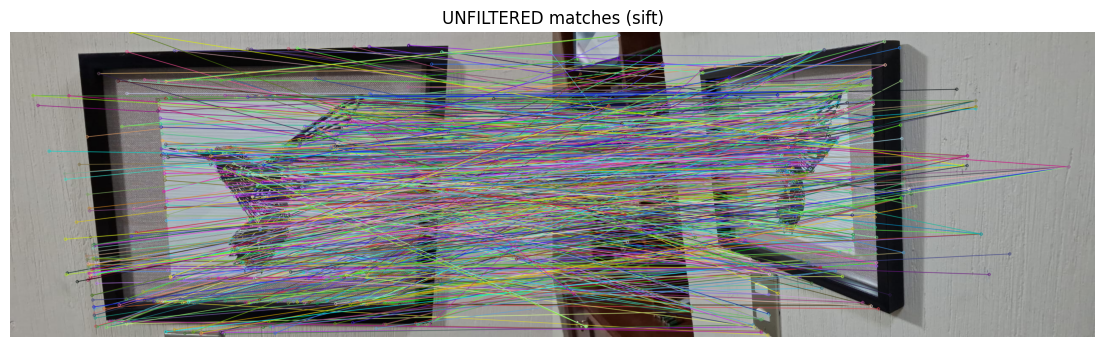

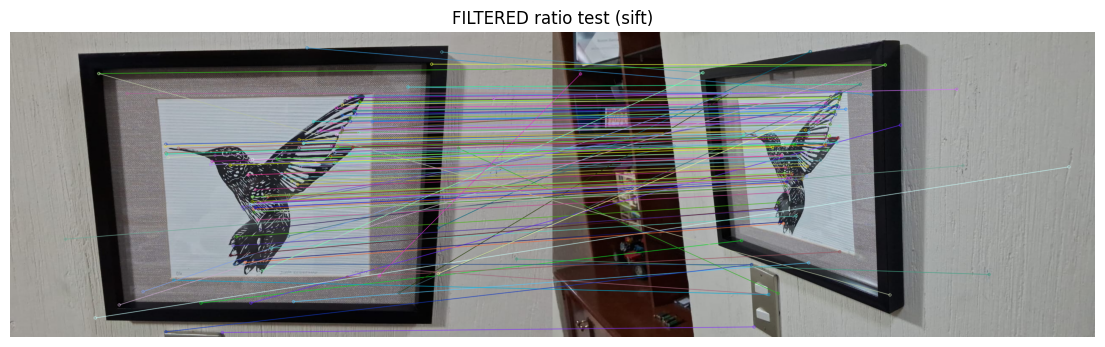

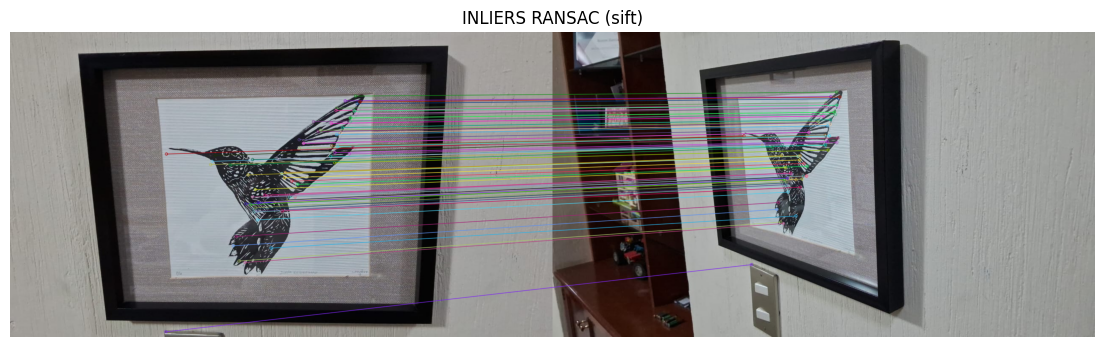

Par: img2.jpeg  <->  img3.jpeg
Método: sift
Keypoints: img1=1247 img2=1059
Matches (sin filtrar): 1247
Matches (ratio test):  64
Guardado sin filtrar:  out\unfiltered_sift_img2.jpeg__img3.jpeg.png
Guardado filtrado:     out\filtered_ratio_sift_img2.jpeg__img3.jpeg.png
  RANSAC: 585 iters | inliers: 20/64
Inliers RANSAC: 20/64


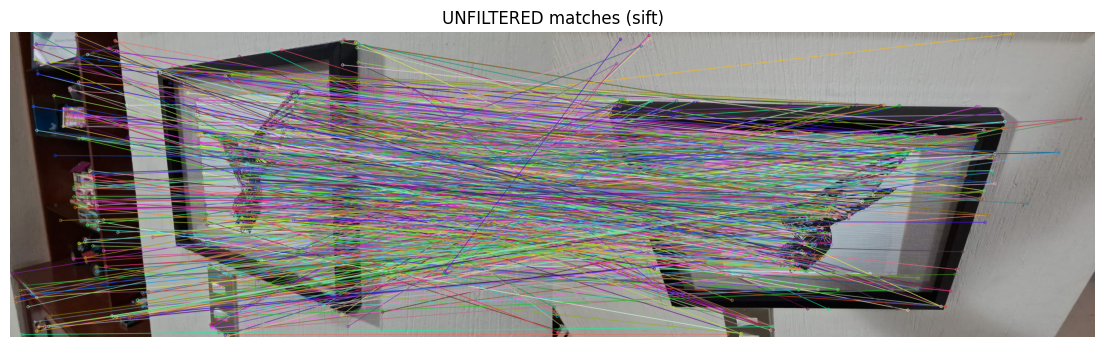

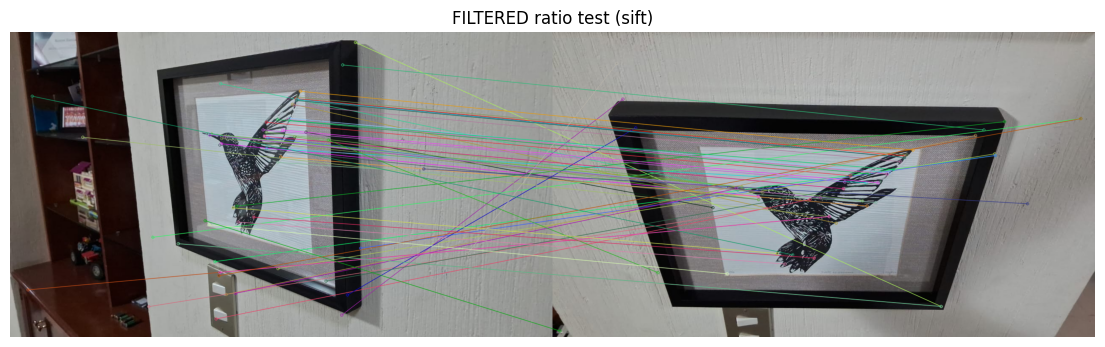

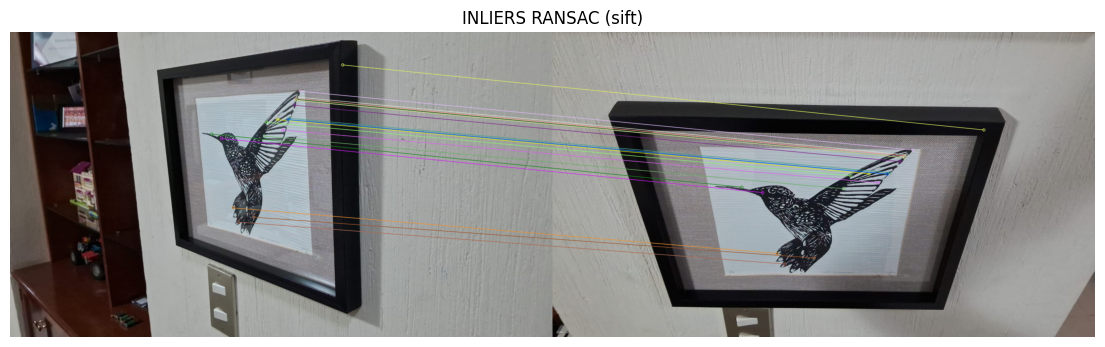

Par: img1.jpeg  <->  img3.jpeg
Método: sift
Keypoints: img1=1401 img2=1059
Matches (sin filtrar): 1401
Matches (ratio test):  301
Guardado sin filtrar:  out\unfiltered_sift_img1.jpeg__img3.jpeg.png
Guardado filtrado:     out\filtered_ratio_sift_img1.jpeg__img3.jpeg.png
  RANSAC: 9 iters | inliers: 241/301
Inliers RANSAC: 241/301


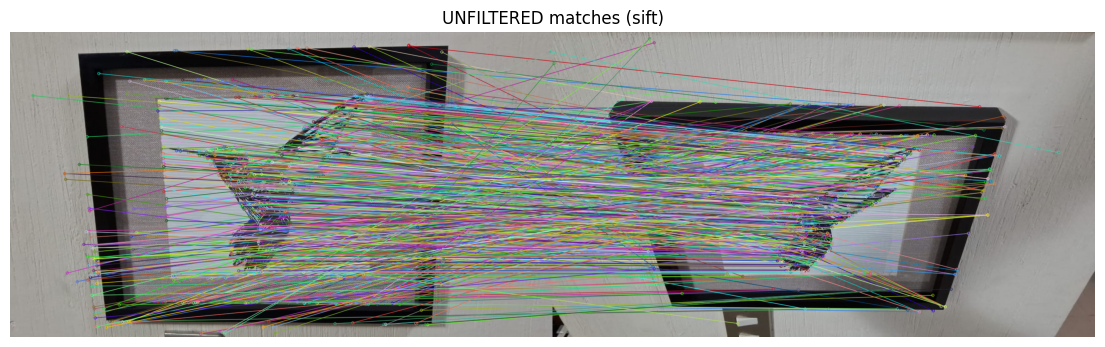

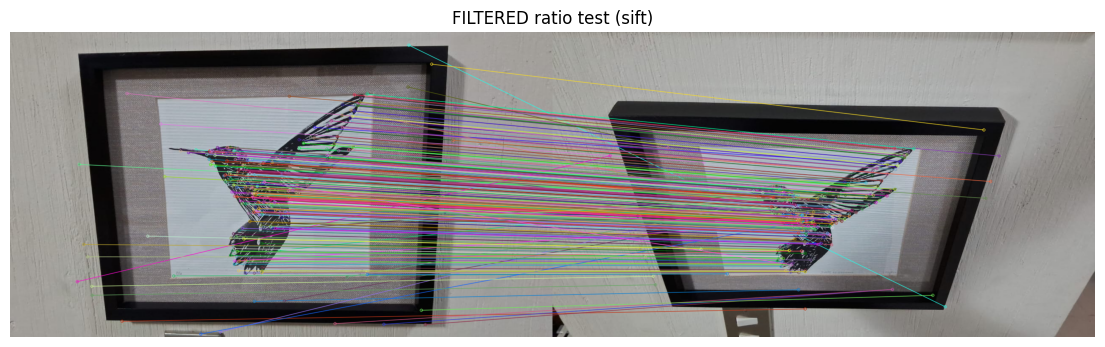

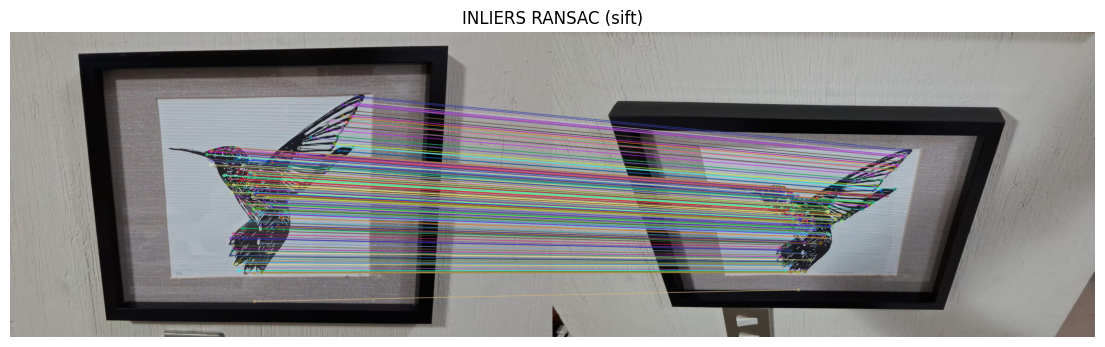

  RANSAC: 33 iters | inliers: 72/119
Panorama guardado: out\panorama_img1.jpeg__img2.jpeg.png


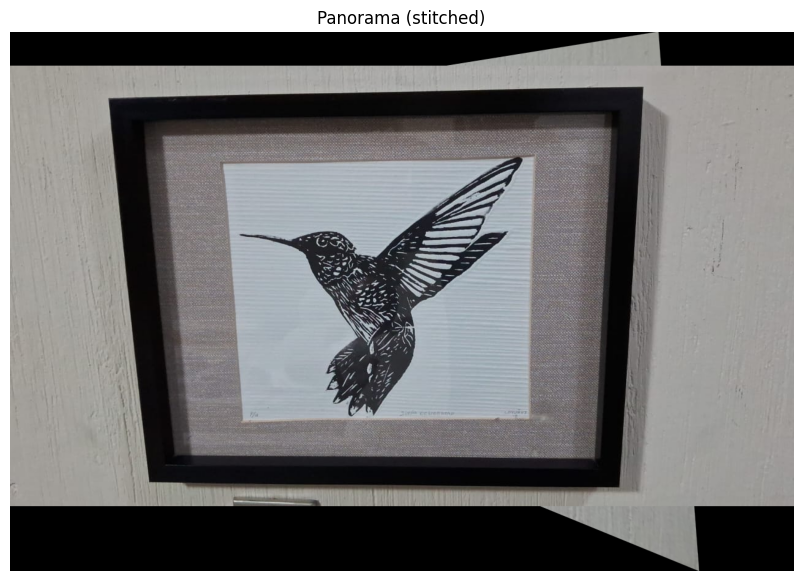

  RANSAC: 395 iters | inliers: 21/64
Panorama guardado: out\panorama_img2.jpeg__img3.jpeg.png


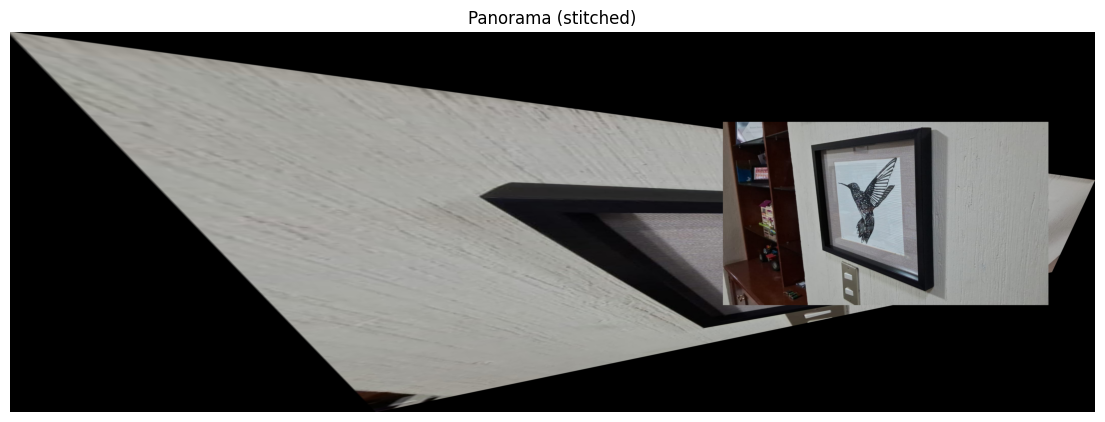

In [13]:
if __name__ == "__main__":
    imgA = "img1.jpeg"
    imgB = "img2.jpeg"
    imgC = "img3.jpeg"
    method = "sift"   # cambia a "orb" si no tienes opencv-contrib

    # --- Detección, matching y visualización (con y sin filtro, con RANSAC) ---
    match_pair(imgA, imgB, method=method, out_dir="out")
    match_pair(imgB, imgC, method=method, out_dir="out")
    match_pair(imgA, imgC, method=method, out_dir="out")

    # --- Stitching (panoramas) ---
    stitch_pair(imgA, imgB, method=method, out_dir="out")
    stitch_pair(imgB, imgC, method=method, out_dir="out")


Conclusion para sin filtro


Bueno una conclusion general de esto para las unfilterd las sin filtrar que pedia mucho ruido pues Las líneas van en direcciones caóticas, cruzándose sin patrón claro. Esto demuestra que el BFMatcher sin restricciones empareja prácticamente cualquier descriptor con cualquier otro, generando cientos de correspondencias falsas

Conclusion para Ratio test 

las líneas ya son mayoritariamente paralelas y horizontales, señal de que hay overlap real. El par img2↔img3 (imagen 2) también luce ordenado aunque hay algo de dispersión porque la perspectiva cambia mucho. El par img1↔img3 (imagen 3) es el más limpio de los tres.

Conclusion para Ransac

quedaron solo las correspondencias horizontales y consistentes. RANSAC eliminó los pocos outliers restantes y densísimo pero paralelo, lo que indica muchos inliers genuinos.

## Task 3

In [ ]:
# =========================
# TASK 3 - Setup
# =========================
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [14]:
def get_good_matches(img1_path, img2_path, method="sift", ratio=0.75):
    """
    Calcula keypoints, descriptores y matches 'good' (ratio test).
    Devuelve: img1, img2, kp1, kp2, good_matches
    """
    img1 = imread_color(img1_path)
    img2 = imread_color(img2_path)

    gray1 = to_gray(img1)
    gray2 = to_gray(img2)

    feat = create_feature(method)
    bf   = create_bf(method)

    kp1, des1 = feat.detectAndCompute(gray1, None)
    kp2, des2 = feat.detectAndCompute(gray2, None)

    if des1 is None or des2 is None or len(kp1) < 10 or len(kp2) < 10:
        raise RuntimeError("Muy pocos keypoints/descriptores. Intenta ORB o mejora la escena/iluminación.")

    knn = bf.knnMatch(des1, des2, k=2)
    good = [m for m, n in knn if m.distance < ratio * n.distance]
    good = sorted(good, key=lambda m: m.distance)
    return img1, img2, kp1, kp2, good

## Task 3.1 — Barrido de umbral y gráfica (Umbral vs Inliers)

In [ ]:
# TASK 3.1 - Umbral vs Inliers


imgA = "img1.jpeg"
imgB = "img2.jpeg"
method = "sift"   # o "orb"
ratio  = 0.75

img1, img2, kp1, kp2, good = get_good_matches(imgA, imgB, method=method, ratio=ratio)

print(f"Matches (ratio test): {len(good)}")

Matches (ratio test): 119


In [16]:
def sweep_thresholds_inliers(good_matches, kp1, kp2, thresholds, prob_exito=0.99):
    """
    Corre tu RANSAC manual con diferentes umbrales.
    Devuelve lista de inliers_count para cada threshold.
    """
    inliers_counts = []
    H_list = []

    for t in thresholds:
        H, inliers = ransac_homografia(good_matches, kp1, kp2, umbral=float(t), prob_exito=prob_exito)
        inliers_counts.append(len(inliers))
        H_list.append(H)
        print(f"threshold={t:>6} px -> inliers={len(inliers):>5}/{len(good_matches)}")

    return inliers_counts, H_list

thresholds = [1, 5, 20]   # lo que pide el enunciado como ejemplo
inliers_counts, Hs = sweep_thresholds_inliers(good, kp1, kp2, thresholds, prob_exito=0.99)

  RANSAC: 441 iters | inliers: 38/119
threshold=     1 px -> inliers=   38/119
  RANSAC: 29 iters | inliers: 74/119
threshold=     5 px -> inliers=   74/119
  RANSAC: 13 iters | inliers: 88/119
threshold=    20 px -> inliers=   88/119


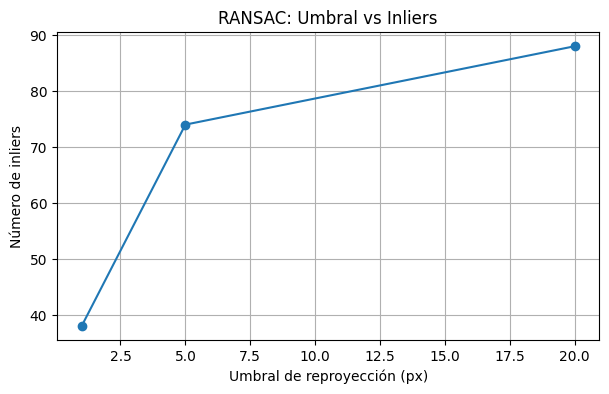

In [17]:
# Gráfica: X=Umbral, Y=#Inliers
plt.figure(figsize=(7,4))
plt.plot(thresholds, inliers_counts, marker="o")
plt.xlabel("Umbral de reproyección (px)")
plt.ylabel("Número de inliers")
plt.title("RANSAC: Umbral vs Inliers")
plt.grid(True)
plt.show()

Con umbral = 1 px dio ~38 inliers: muy estricto. Cualquier mini error de detección/ruido ya deja matches fuera.

Con 5 px sube fuerte a ~74: acá ya se tolera error realista de keypoints (ruido + distorsión).

Con 20 px llega ~88 y en el barrido fino se queda cerca de 88 desde ~19–25 px: eso es el plateau.


Interpretación clave: la curva tiene subida rápida (umbral pequeño → estás dejando fuera inliers reales) y

  RANSAC: 441 iters | inliers: 38/119
threshold=     1 px -> inliers=   38/119
  RANSAC: 37 iters | inliers: 70/119
threshold=     3 px -> inliers=   70/119
  RANSAC: 29 iters | inliers: 74/119
threshold=     5 px -> inliers=   74/119
  RANSAC: 23 iters | inliers: 79/119
threshold=     7 px -> inliers=   79/119
  RANSAC: 20 iters | inliers: 81/119
threshold=     9 px -> inliers=   81/119
  RANSAC: 18 iters | inliers: 83/119
threshold=    11 px -> inliers=   83/119
  RANSAC: 16 iters | inliers: 85/119
threshold=    13 px -> inliers=   85/119
  RANSAC: 16 iters | inliers: 85/119
threshold=    15 px -> inliers=   85/119
  RANSAC: 14 iters | inliers: 87/119
threshold=    17 px -> inliers=   87/119
  RANSAC: 13 iters | inliers: 88/119
threshold=    19 px -> inliers=   88/119
  RANSAC: 13 iters | inliers: 88/119
threshold=    21 px -> inliers=   88/119
  RANSAC: 13 iters | inliers: 88/119
threshold=    23 px -> inliers=   88/119
  RANSAC: 13 iters | inliers: 88/119
threshold=    25 px -> inl

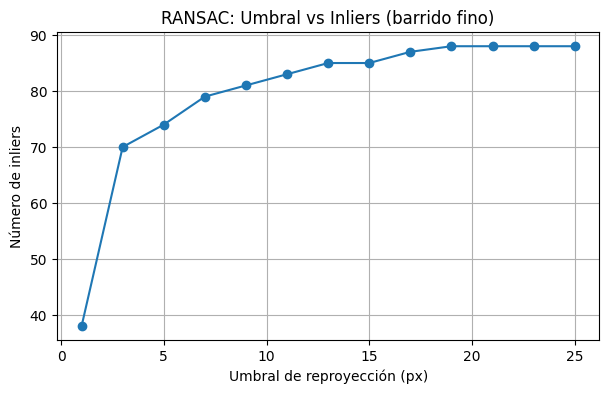

In [18]:
thresholds_fine = list(range(1, 26, 2))  # 1,3,5,...,25
inliers_fine, _ = sweep_thresholds_inliers(good, kp1, kp2, thresholds_fine, prob_exito=0.99)

plt.figure(figsize=(7,4))
plt.plot(thresholds_fine, inliers_fine, marker="o")
plt.xlabel("Umbral de reproyección (px)")
plt.ylabel("Número de inliers")
plt.title("RANSAC: Umbral vs Inliers (barrido fino)")
plt.grid(True)
plt.show()

### Discusión (Task 3.1.b)

- **Si el umbral es demasiado estricto (ej. 0.5 px)**:
Demasiado pocos inliers, porque ningún keypoint es perfecto (hay blur, cuantización, perspectiva, etc.).

RANSAC se vuelve inestable: puede

no encontrar una homografía decente,

o encontrar una basada en 4–10 inliers (sobreajuste), y tu stitching sale torcido / con ghosting.

- **Si el umbral es demasiado laxo (ej. 50 px)**:
  - Riesgo: empiezas a “aceptar” matches malos como inliers.
  - Consecuencia: la homografía final queda **contaminada por outliers**, se deforma la escena, hay ghosting, estiramientos raros, y el panorama se ve como que alguien lo dobló con la mente.

## Task 3.2 — Caso drones (Homografía global + optimización)
### Task 3.2 (A) — ¿Es válido usar una homografía global para unir TODO el mapa del terreno?

**Respuesta corta:** No, no de forma general.

Una homografía global asume escena plana (o cámara rotando sin traslación). Con colinas, el terreno tiene profundidad variable, entonces una sola homografía no puede alinear todo bien a la vez: funcionará en una zona, pero fallará en otra.

**Qué sí sería válido:** usar homografía en **regiones planas específicas**, por ejemplo:
- mosaico solo de **paneles solares** (ellos sí son planos), o
- un enfoque por **homografías locales / piecewise** (dividir en tiles y ajustar por sectores), o
- modelado 3D (SfM / SLAM) si de verdad querés un mapa del terreno completo coherente.

### Task 3.2 (B) — RANSAC tarda ~3s/frame y 90% de outliers: estrategia concreta para acelerar sin cambiar hardware

Contexto clave: 90% outliers ⇒ tasa de inliers **w ≈ 0.1**.  
En RANSAC, el número de iteraciones crece brutal con w bajo, porque:

N ≈ log(1-p) / log(1 - w^s), con s=4 para homografía.

Si 90% son outliers, la tasa de inliers es w≈0.1, y RANSAC sufre porque necesita un montón de iteraciones. Entonces la idea es: subir w antes de RANSAC y/o hacer muestreo más inteligente.

Estrategias concretas:

Entonces, **tu meta real** es subir w *antes* de RANSAC o bajar el costo por iteración.

Subir w (menos outliers antes de RANSAC)

Ratio test más estricto (0.75 → 0.65/0.70).

Cross-check (match bidireccional) para quedarte solo con matches consistentes.

Limitar keypoints a top-K por respuesta (ej. 1000).

Muestreo guiado (tipo PROSAC “casero”)

Al inicio samplear solo matches con menor distancia (los más confiables).

Salida temprana: si encontrás un modelo con un porcentaje alto de inliers, cortás.

Filtrado geométrico rápido antes

Clustering de desplazamientos (Δx, Δy) y quedarte con el cluster dominante.

Si sabés dónde están los paneles, usar ROI/máscara y no buscar features en todo el terreno.